In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import missingno as mano
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime, timedelta
from sklearn import preprocessing
import pyodbc
from scipy.stats import normaltest, shapiro, chisquare, kstest

In [2]:
import import_ipynb

In [3]:
import Template as tm

importing Jupyter notebook from Template.ipynb


In [4]:
df_stroke=tm.load_data('health.csv','csv')

In [5]:
tm.df_details(df_stroke,10)

Shape:  (5110, 12)
Column types: 
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
H/T?H


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
tm.missing_count(df_stroke)

,Missing percentage,Missing sum
id,0.000000,0
gender,0.000000,0
age,0.000000,0
hypertension,0.000000,0
heart_disease,0.000000,0
ever_married,0.000000,0
work_type,0.000000,0
Residence_type,0.000000,0
avg_glucose_level,0.000000,0
bmi,3.933464,201


id should have no impact on stroke. It is better to remove the column.

In [7]:
df_stroke=tm.remove_columns(df_stroke,['id'])
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


0    4861
1     249
Name: stroke, dtype: int64


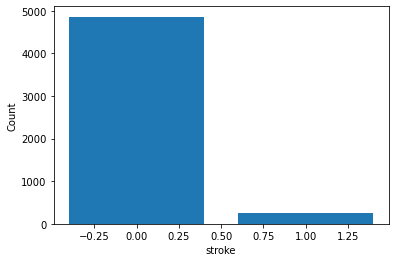

In [8]:
tm.categorical_count(df_stroke,'stroke') # classes are highly imbalanced s might need to over or under sample the data later.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


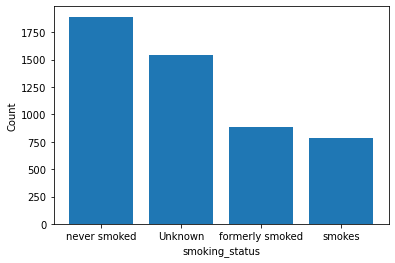

In [9]:
# checking for any incorrect values in categorical columns
tm.categorical_count(df_stroke,'smoking_status')


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


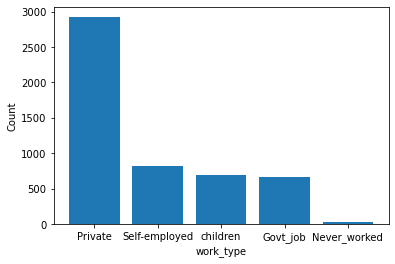

In [10]:
tm.categorical_count(df_stroke,'work_type')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


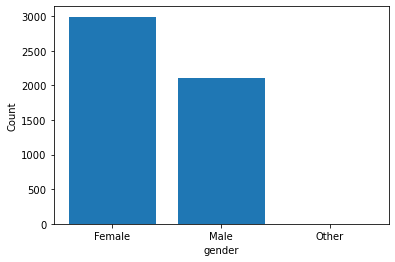

In [11]:
tm.categorical_count(df_stroke,'gender')

0    4612
1     498
Name: hypertension, dtype: int64


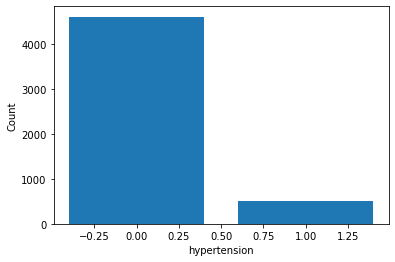

In [12]:
tm.categorical_count(df_stroke,'hypertension')

0    4834
1     276
Name: heart_disease, dtype: int64


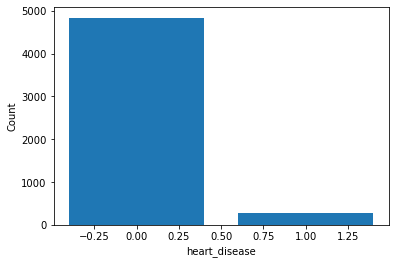

In [13]:
tm.categorical_count(df_stroke,'heart_disease')

Yes    3353
No     1757
Name: ever_married, dtype: int64


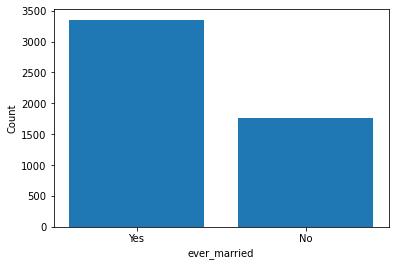

In [14]:
tm.categorical_count(df_stroke,'ever_married')

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


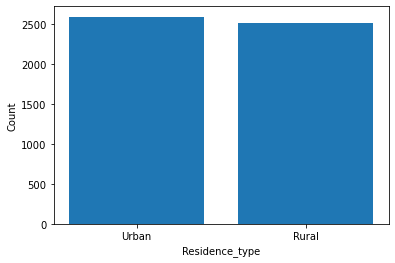

In [15]:
tm.categorical_count(df_stroke,'Residence_type')

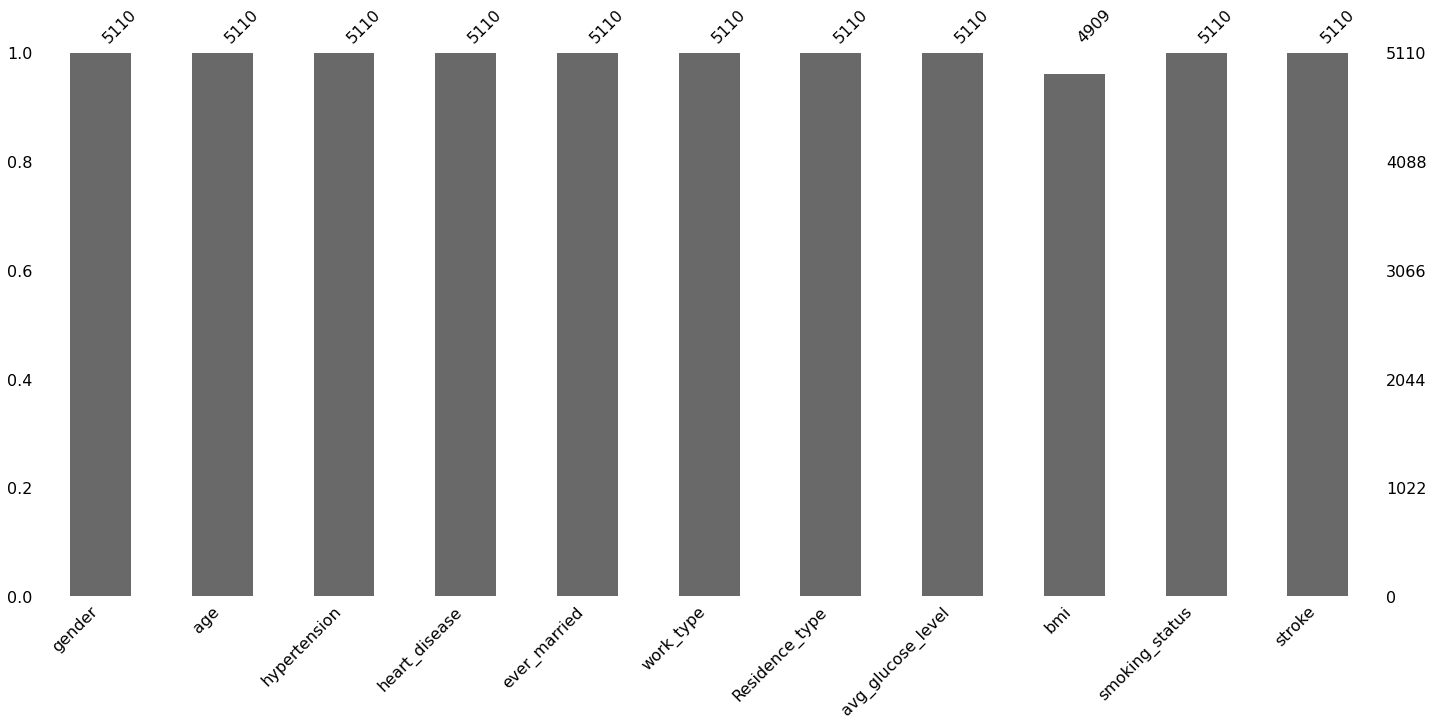

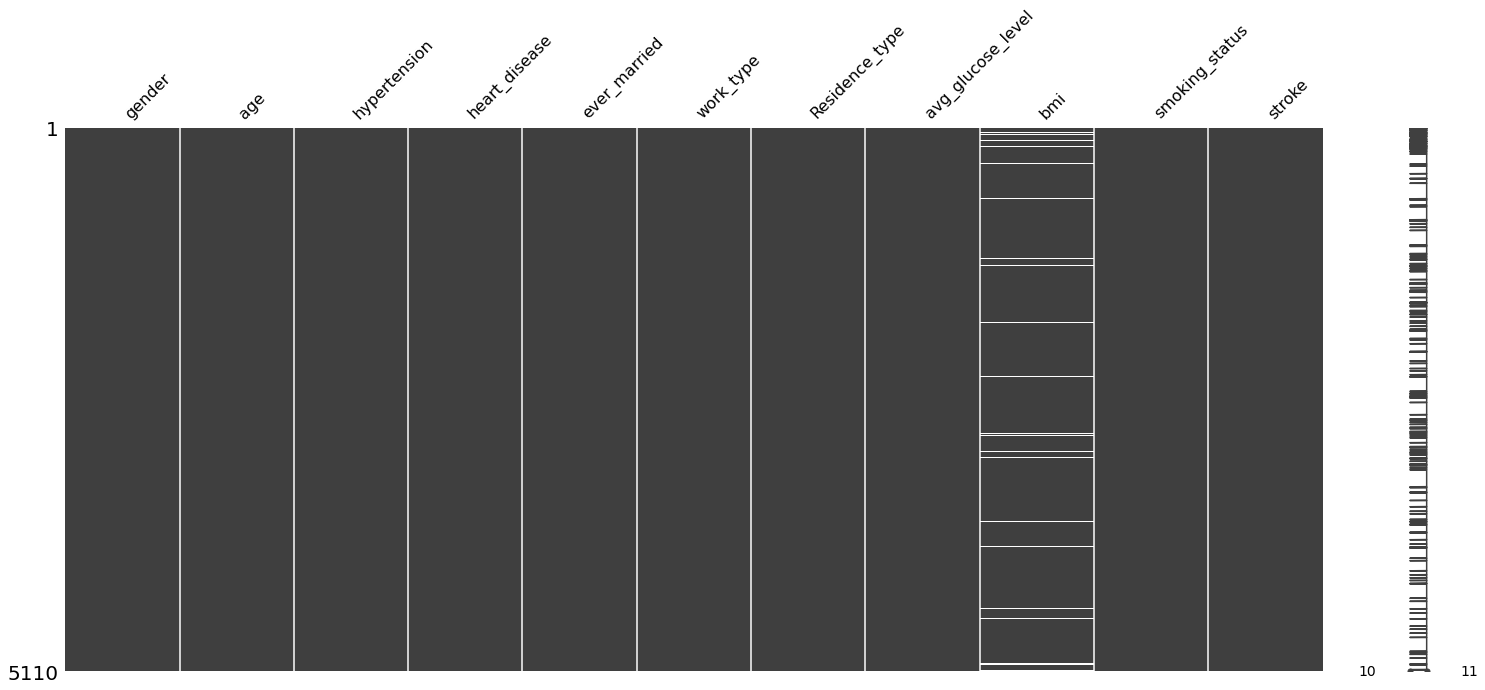

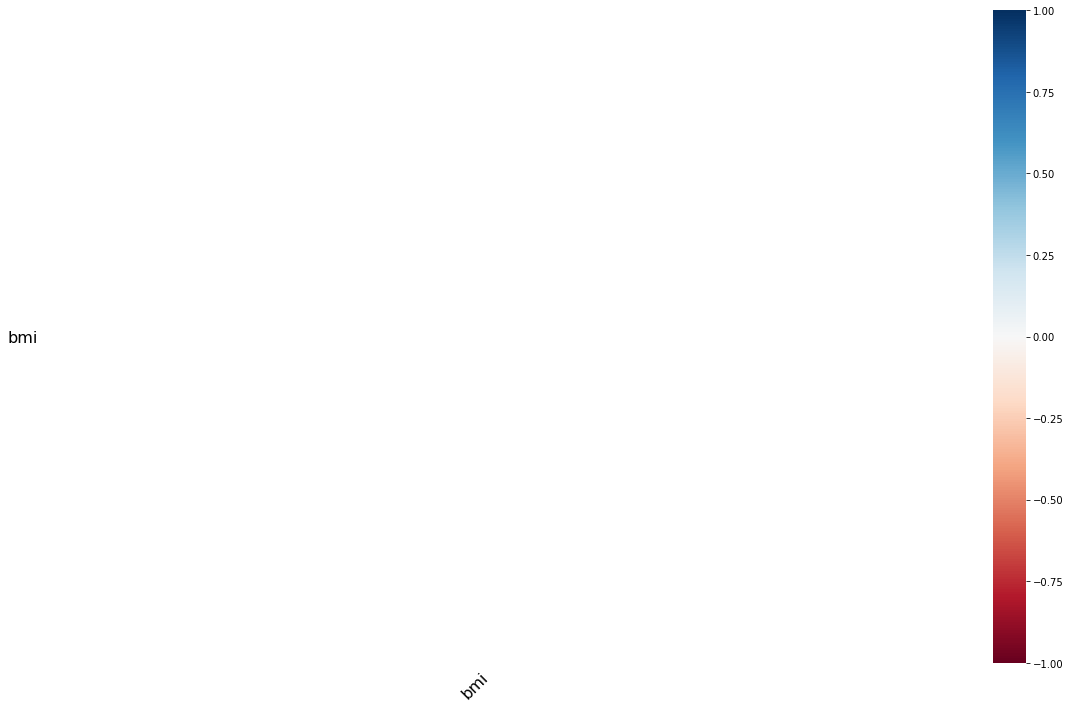

In [16]:
tm.mano_analysis(df_stroke)

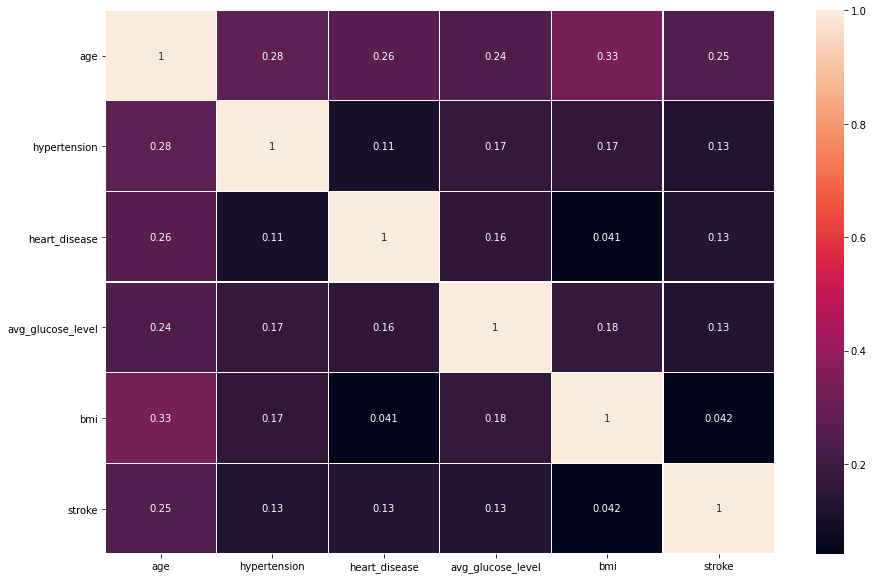

In [17]:
tm.corr_heatmap(df_stroke)

In [18]:
tm.df_details(df_stroke)

Shape:  (5110, 11)
Column types: 
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
H/T?H


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
df_stroke_temp=df_stroke.loc[:,['gender','smoking_status','bmi']]

In [20]:
na=df_stroke_temp.loc[df_stroke_temp['bmi'].isna(),:]
na

,gender,smoking_status,bmi
1,Female,never smoked,NaN
8,Female,Unknown,NaN
13,Male,Unknown,NaN
19,Male,Unknown,NaN
27,Male,Unknown,NaN
...,...,...,...
5039,Male,formerly smoked,NaN
5048,Male,smokes,NaN
5093,Female,smokes,NaN
5099,Male,smokes,NaN


In [21]:
print(na['gender'].value_counts())
print(na['smoking_status'].value_counts())

Male      104
Female     97
Name: gender, dtype: int64
Unknown            61
smokes             52
formerly smoked    48
never smoked       40
Name: smoking_status, dtype: int64


Since bmi is highly correlated with age, we can impute the bmi value using KNN imputation.

How many columns do you want to impute? 2
Enter column: age
Enter number of neighbors: 3
knn plot column x: age
knn plot column y: bmi


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


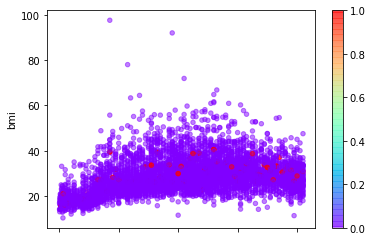

In [22]:
df_stroke=tm.fill_mv(df_stroke,'bmi','knn')

In [23]:
tm.missing_count(df_stroke)

,Missing percentage,Missing sum
gender,0.0,0
age,0.0,0
hypertension,0.0,0
heart_disease,0.0,0
ever_married,0.0,0
work_type,0.0,0
Residence_type,0.0,0
avg_glucose_level,0.0,0
bmi,0.0,0
smoking_status,0.0,0


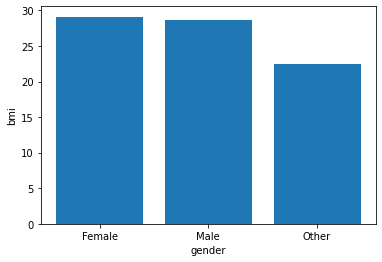

In [24]:
tm.categorical_analysis(df_stroke,'gender','bmi','mean') # average body mass index is almost same for male and female

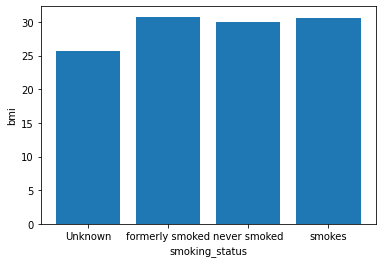

In [25]:
tm.categorical_analysis(df_stroke,'smoking_status','bmi','mean')

In [27]:
tm.anova_test(df_stroke)

Enter the KPI: bmi
Enter the categorical column: "gender"

Anova => bmi - "gender"


,sum_sq,df,F,PR(>F)
"C(Q(""gender""))",244.394796,2.0,2.027102,0.131823
Residual,307859.213354,5107.0,NaN,NaN


In [28]:
tm.anova_test(df_stroke)

Enter the KPI: bmi
Enter the categorical column: "smoking_status"

Anova => bmi - "smoking_status"


,sum_sq,df,F,PR(>F)
"C(Q(""smoking_status""))",22940.198289,3.0,136.91875,2.538788e-85
Residual,285163.409861,5106.0,NaN,NaN


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_stroke['bmi'],
                          groups=df_stroke['smoking_status'],
                          alpha=0.05)

#display results
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
        Unknown formerly smoked   5.0115  0.001  4.2018 5.8212   True
        Unknown    never smoked   4.2791  0.001  3.6204 4.9378   True
        Unknown          smokes   4.8011  0.001  3.9606 5.6415   True
formerly smoked    never smoked  -0.7324 0.0761 -1.5145 0.0497  False
formerly smoked          smokes  -0.2104    0.9 -1.1507 0.7299  False
   never smoked          smokes    0.522 0.3521 -0.2919 1.3359  False
---------------------------------------------------------------------


In [30]:
tm.df_details(df_stroke,10)

Shape:  (5110, 11)
Column types: 
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
H/T?H


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.466667,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.600000,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


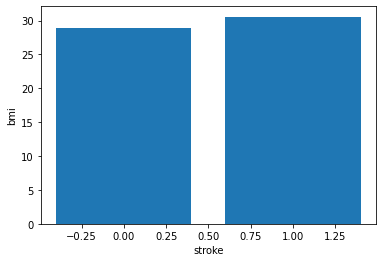

In [31]:
tm.categorical_analysis(df_stroke,'stroke','bmi','mean')

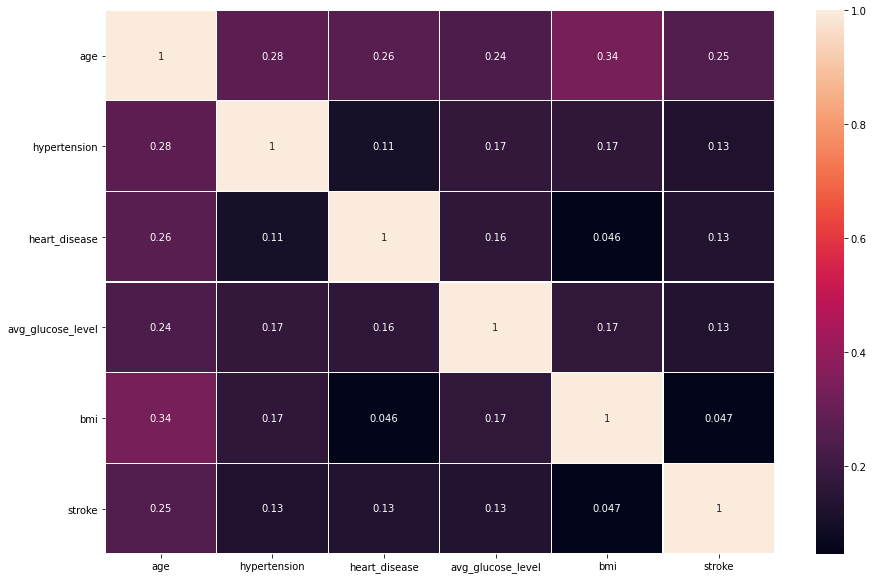

In [32]:
tm.corr_heatmap(df_stroke)

In [35]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for i in cat:
    data_crosstab = pd.crosstab(df_stroke[i], df_stroke['stroke'], 
    margins = False) 
    #print(data_crosstab) 
    #print("")

    stat, p, dof, expected = chi2_contingency(data_crosstab)
    #print(expected)
    #print("")

    # interpret p-value
    print(i)
    print('P value: ', p)
    if p<0.05:
        print('Dependent (reject null hypothesis)')
    else:
        print('Independent (accept null hypothesis)')
    print("")

gender
P value:  0.7895490538408245
Independent (accept null hypothesis)

hypertension
P value:  1.661621901511823e-19
Dependent (reject null hypothesis)

heart_disease
P value:  2.088784568522924e-21
Dependent (reject null hypothesis)

ever_married
P value:  1.6389021142314745e-14
Dependent (reject null hypothesis)

work_type
P value:  5.397707801896119e-10
Dependent (reject null hypothesis)

Residence_type
P value:  0.29833169286876987
Independent (accept null hypothesis)

smoking_status
P value:  2.0853997025008455e-06
Dependent (reject null hypothesis)



count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

According to skew and kurtosis test: 
Skew =  -0.1370190866396024
Kurtosis =  -0.9912147700517671
stat=  1120.5286442208073
p=  4.7895697274981233e-244
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.96723872423172
p=  1.3734279099703845e-32
Probably not Normal

According to Chi-Squared normality test: 
stat=  60434.853753214295
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  0.9644035266259041
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


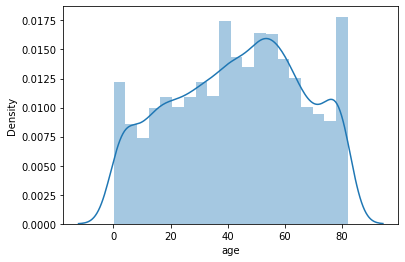

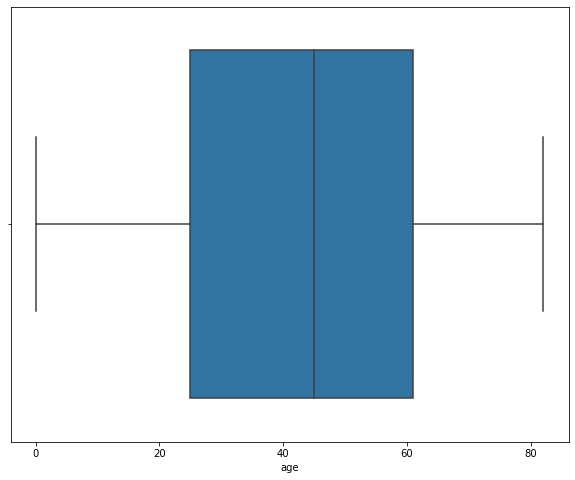

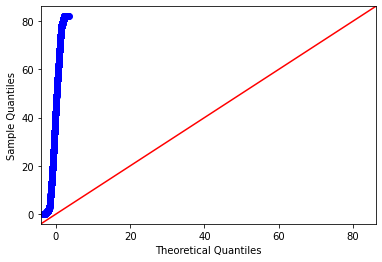

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

According to skew and kurtosis test: 
Skew =  1.571822297397199
Kurtosis =  1.6776607484156187
stat=  1328.9357947091423
p=  2.662310941715711e-289
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.8058695793151855
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  98697.58693532678
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


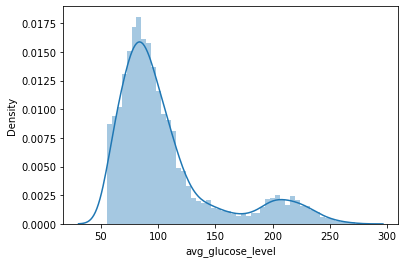

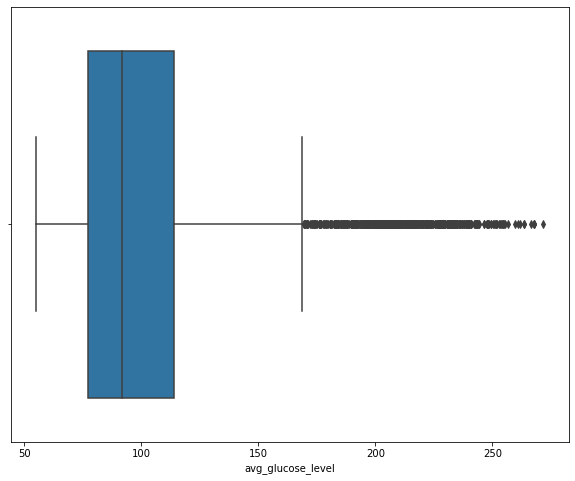

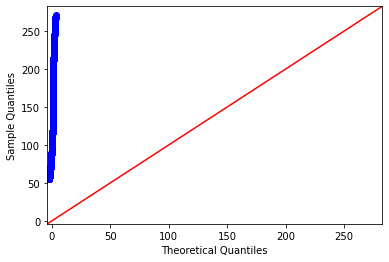

count    5110.000000
mean       28.940789
std         7.765697
min        10.300000
25%        23.700000
50%        28.200000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

According to skew and kurtosis test: 
Skew =  1.0330069914899787
Kurtosis =  3.390073048631102
stat=  1045.9921685247014
p=  7.339839238624252e-228
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.9554035663604736
p=  6.410176374259411e-37
Probably not Normal

According to Chi-Squared normality test: 
stat=  10645.998798943852
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


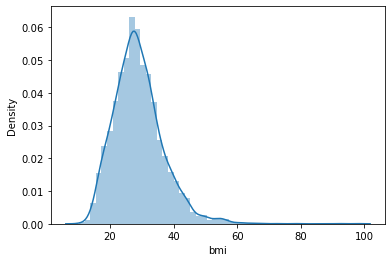

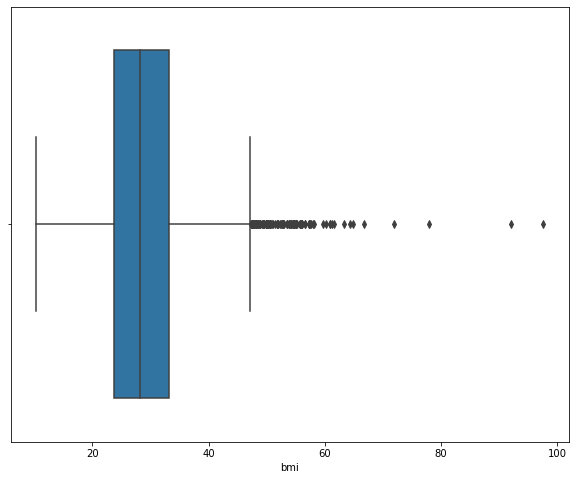

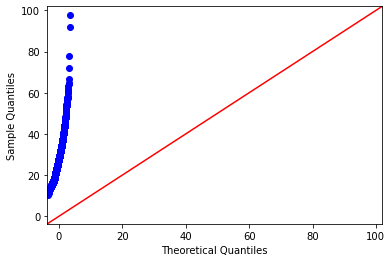

In [36]:
num=['age','avg_glucose_level','bmi']
for i in num:
    tm.numerical_analysis(df_stroke,i)

In [37]:
df_stroke_enc=tm.df_copy(df_stroke)

In [38]:
column=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in column:
    df_stroke_enc[i]=tm.encode(df_stroke_enc,i,'label')
df_stroke_enc

C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,0,0,0,202.21,30.466667,0,1
2,1,80.0,0,1,1,1,1,105.92,32.500000,1,1
3,0,49.0,0,0,0,0,0,171.23,34.400000,0,1
4,0,79.0,1,0,0,0,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,0,0,0,83.75,28.833333,0,0
5106,0,81.0,0,0,0,0,0,125.20,40.000000,0,0
5107,0,35.0,0,0,0,0,0,82.99,30.600000,0,0
5108,1,51.0,0,0,1,1,1,166.29,25.600000,1,0


Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 3
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.19      0.05      0.08        62

    accuracy                           0.93      1022
   macro avg       0.56      0.52      0.52      1022
weighted avg       0.90      0.93      0.91      1022

Accuracy(%): 
92.95499021526419
Precision(%): 
18.75
F1 score: 
0.07692307692307691
Logistic loss: 
2.4332703475539748


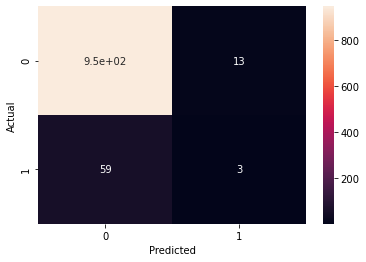

In [39]:
tm.ml(df_stroke_enc,'stroke','KNN') #knn without oversampling (label encoded)

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 3
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.16      0.26      0.20        62

    accuracy                           0.87      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.90      0.87      0.89      1022

Accuracy(%): 
87.37769080234834
Precision(%): 
16.161616161616163
F1 score: 
0.19875776397515527
Logistic loss: 
4.359656087602922


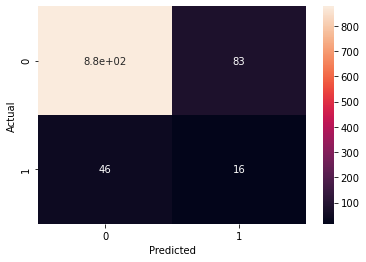

In [40]:
tm.ml(df_stroke_enc,'stroke','KNN') #knn with oversampling (label encoded)

In [41]:
df_stroke_enc=tm.df_copy(df_stroke)

In [42]:
column=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

df_stroke_enc=tm.encode(df_stroke_enc,column,'onehot')
df_stroke_enc

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.600000,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,30.466667,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.500000,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.400000,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.000000,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.833333,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,125.20,40.000000,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,82.99,30.600000,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,166.29,25.600000,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 3
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.22      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.58      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022

Accuracy(%): 
93.44422700587084
Precision(%): 
22.22222222222222
F1 score: 
0.056338028169014086
Logistic loss: 
2.2642892520949385


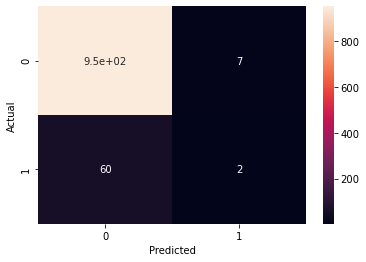

In [43]:
tm.ml(df_stroke_enc,'stroke','KNN') # knn without oversampling (one hot encoded)

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 3
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       960
           1       0.12      0.18      0.15        62

    accuracy                           0.87      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.90      0.87      0.88      1022

Accuracy(%): 
87.37769080234834
Precision(%): 
12.359550561797752
F1 score: 
0.14569536423841056
Logistic loss: 
4.359652175678115


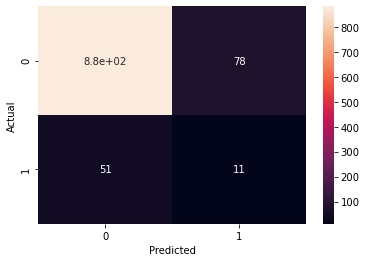

In [45]:
tm.ml(df_stroke_enc,'stroke','KNN') # knn with oversampling (one hot encoded)

What do you want your test size to be? 0.2


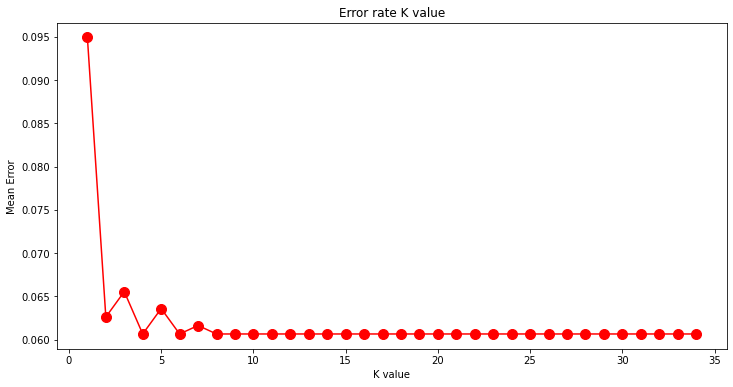

In [46]:
tm.error_rate_plot(df_stroke_enc, 'stroke', classification=True, oversample=False)

What do you want your test size to be? 0.2


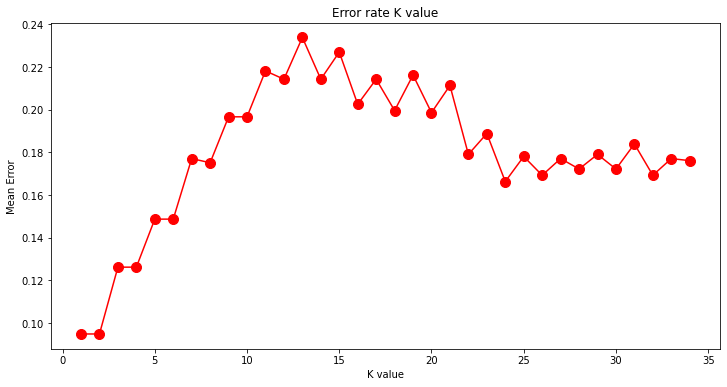

In [47]:
tm.error_rate_plot(df_stroke_enc, 'stroke', classification=True, oversample=True)

Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 5
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

Accuracy(%): 
93.63992172211351
Precision(%): 
20.0
F1 score: 
0.029850746268656716
Logistic loss: 
2.196696344480348


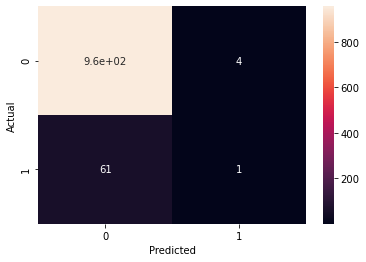

In [49]:
tm.ml(df_stroke_enc,'stroke','KNN')

Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 6
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

Accuracy(%): 
93.9334637964775
Precision(%): 
50.0
F1 score: 
0.03125
Logistic loss: 
2.095308156635903


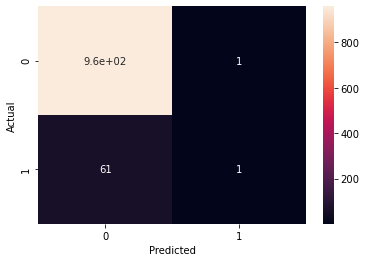

In [50]:
tm.ml(df_stroke_enc,'stroke','KNN')

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 2
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.13      0.10      0.11        62

    accuracy                           0.91      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.89      0.91      0.90      1022

Accuracy(%): 
90.50880626223092
Precision(%): 
12.76595744680851
F1 score: 
0.11009174311926605
Logistic loss: 
3.2781742600792314


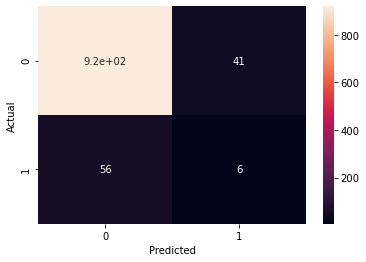

In [55]:
tm.ml(df_stroke_enc,'stroke','KNN')

In [74]:
# removing bmi, gender, residence type
subset=tm.df_copy(df_stroke)
subset=tm.remove_columns(subset,['bmi','gender','Residence_type'])
subset

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,never smoked,1
2,80.0,0,1,Yes,Private,105.92,never smoked,1
3,49.0,0,0,Yes,Private,171.23,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,never smoked,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,83.75,never smoked,0
5106,81.0,0,0,Yes,Self-employed,125.20,never smoked,0
5107,35.0,0,0,Yes,Self-employed,82.99,never smoked,0
5108,51.0,0,0,Yes,Private,166.29,formerly smoked,0


In [75]:
column=['ever_married','work_type','smoking_status']
subset=tm.encode(subset,column,'onehot')
subset

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,1,0,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,1,0,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,1,0,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,1,0,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0,0,1,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,0,0,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,0,0,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,0,0,1,0,0,1,0,0,0,1,0,0


What do you want your test size to be? 0.2


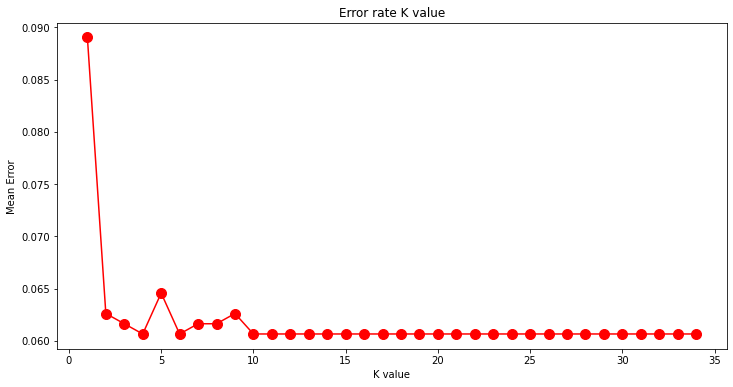

In [76]:
tm.error_rate_plot(subset, 'stroke', classification=True, oversample=False)

What do you want your test size to be? 0.2


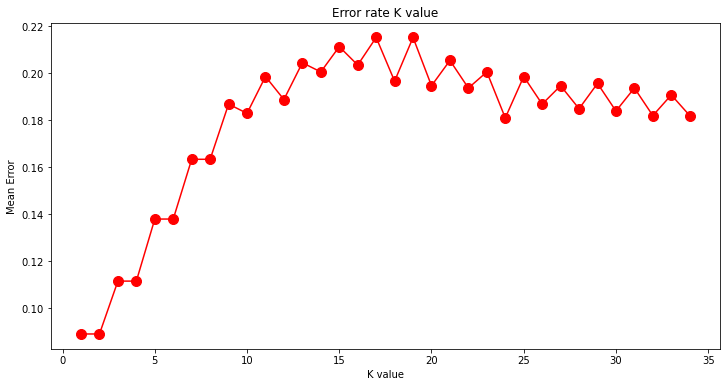

In [77]:
tm.error_rate_plot(subset, 'stroke', classification=True, oversample=True)

Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 6
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

Accuracy(%): 
93.9334637964775
Precision(%): 
50.0
F1 score: 
0.03125
Logistic loss: 
2.095308156635903


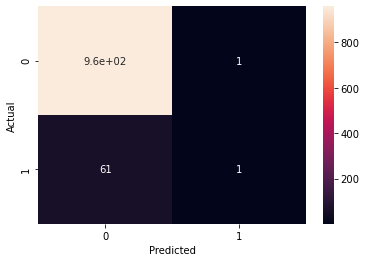

In [81]:
tm.ml(df_stroke_enc,'stroke','KNN')